In [1]:
def exp_reward(action,history):
    rewards_for_action = history[action]
    return sum(rewards_for_action_action)/len(rewards_for_action)

In [2]:
def get_best_action(actions):
    best_action = 0
    max_action_value = 0
    for i in range(len(actions)):
        cur_action_value = get_action_value(actions[i])
        if cur_action_value > max_action_value:
            best_action = i
            max_action_value = cur_action_value
    return best_action
def get_action_value(action):
    return exp_reward(action)

In [4]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

n = 10
probs = np.random.rand(n)
eps = 0.1

In [5]:
def get_reward(prob, n = 10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [6]:
reward_test = [get_reward(0.5) for _ in range(10000)]
print(np.mean(reward_test))

4.9825


(array([ 126.,  425., 1179., 2063., 2473., 2059., 1159.,  408.,  108.]),
 array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
 <a list of 9 Patch objects>)

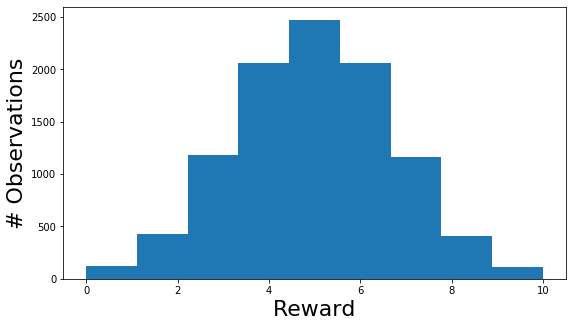

In [7]:
plt.figure(figsize=(9,5))
plt.xlabel("Reward",fontsize=22)
plt.ylabel("# Observations",fontsize=22)
plt.hist(reward_test,bins=9)

In [56]:
record = np.zeros((n,2))
record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [38]:
record[:,1].shape

(10,)

In [39]:
x = [[0,1],[2,3],[4,5]]

In [41]:
x = np.array(x)

In [42]:
print(x[:,1])

[1 3 5]


In [43]:
print(x[:,0])

[0 2 4]


In [44]:
def update_record(record,action,r):
    new_r = (record[action,0]*record[action,1]+r)/(record[action,0]+1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

In [45]:
def get_best_arm(record):
    arm_index = np.argmax(record[:,1],axis=0)
    return arm_index

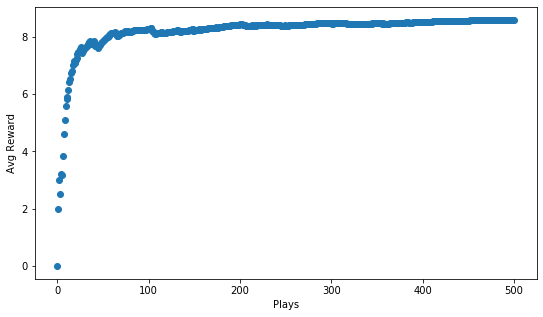

In [78]:
last = []
record = np.zeros((n,2))
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    if random.random() > 0.12:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    r = get_reward(probs[choice])
    last.append(r)
    record = update_record(record,choice,r)
    mean_reward = ((i+1)*rewards[-1]+r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

In [59]:
probs

array([0.31055776, 0.61022612, 0.91415986, 0.57508574, 0.06103511,
       0.37659255, 0.46995571, 0.8502796 , 0.49183502, 0.53687423])

In [67]:
record = np.zeros((n,2))
probs

array([0.36669551, 0.24320563, 0.57803237, 0.89974419, 0.05089633,
       0.72437158, 0.28288306, 0.76860582, 0.90441922, 0.87377439])

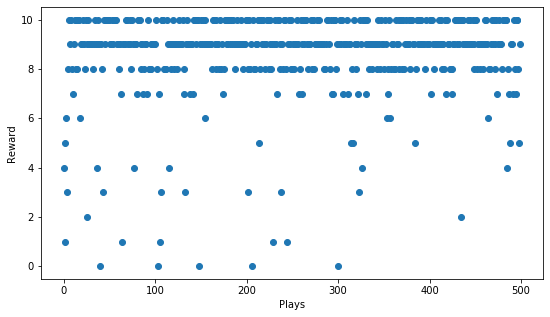

In [79]:
fig2,ax2 = plt.subplots(1,1)
ax2.set_xlabel("Plays")
ax2.set_ylabel("Reward")
fig2.set_size_inches(9,5)
ax2.scatter(np.arange(len(last)),last)

In [98]:
reward_test = [get_reward(0.8) for _ in range(10)]
print(np.mean(reward_test))

8.0


In [99]:
print(reward_test)

[8, 9, 9, 7, 7, 6, 9, 7, 9, 9]


In [3]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

n = 10
probs = np.random.rand(n)
def exp_reward(action,history):
    rewards_for_action = history[action]
    return sum(rewards_for_action_action)/len(rewards_for_action)
def get_best_action(actions):
    best_action = 0
    max_action_value = 0
    for i in range(len(actions)):
        cur_action_value = get_action_value(actions[i])
        if cur_action_value > max_action_value:
            best_action = i
            max_action_value = cur_action_value
    return best_action
def get_reward(prob, n = 10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward
def get_action_value(action):
    return exp_reward(action)
def update_record(record,action,r):
    new_r = (record[action,0]*record[action,1]+r)/(record[action,0]+1)
    record[action,0] += 1
    record[action,1] = new_r
    return record
def get_best_arm(record):
    arm_index = np.argmax(record[:,1],axis=0)
    return arm_index
last = []
record = np.zeros((n,2))
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    if random.random() > 0.12:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    r = get_reward(probs[choice])
    last.append(r)
    record = update_record(record,choice,r)
    mean_reward = ((i+1)*rewards[-1]+r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)